In [1]:
import sys
sys.path.append('C:/Python34/Lib/site-packages')
import numpy as np
from scipy import stats
import math
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
heights = Table.read_table('Galton.csv')
# Data from http://www.math.uah.edu/stat/data/Galton.html
heights

Family,Father,Mother,Gender,Height,Kids
1,78.5,67,M,73.2,4
1,78.5,67,F,69.2,4
1,78.5,67,F,69,4
1,78.5,67,F,69,4
2,75.5,66.5,M,73.5,4
2,75.5,66.5,M,72.5,4
2,75.5,66.5,F,65.5,4
2,75.5,66.5,F,65.5,4
3,75,64,M,71,2
3,75,64,F,68,2


In [3]:
father_son = heights.where("Gender", "M").drop(["Family", "Mother", "Gender", "Kids"])
father_son = father_son.relabeled(1, "Son")
father_son

Father,Son
78.5,73.2
75.5,73.5
75.5,72.5
75,71
75,70.5
75,68.5
75,72
75,69
75,68
74,76.5


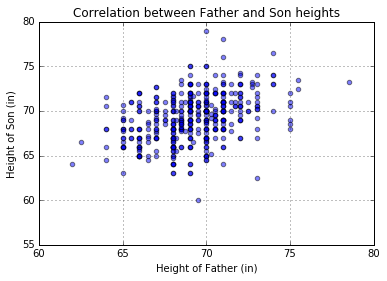

In [4]:
plt.scatter(father_son["Father"], father_son["Son"], alpha=0.5)
plt.title("Correlation between Father and Son heights")
plt.xlabel("Height of Father (in)")
plt.ylabel("Height of Son (in)")
plt.grid(True, which='both')

In [5]:
father_mean = np.mean(father_son["Father"])
father_sd = np.std(father_son["Father"])
son_mean = np.mean(father_son["Son"])
son_sd = np.std(father_son["Son"])

rho = np.corrcoef(father_son["Father"], father_son["Son"])[0][1]

print("Fathers:")
print("Mean:", father_mean, "SD", father_sd)
print("Sons:")
print("Mean:", son_mean, "SD", son_sd)
print("Correlation", rho)

Fathers:
Mean: 69.168172043 SD 2.29745485464
Sons:
Mean: 69.2288172043 SD 2.62876308845
Correlation 0.391317358142


In [6]:
std_father_son = father_son
std_father_son["Father"] = stats.zscore(father_son["Father"])
std_father_son["Son"] = stats.zscore(father_son["Son"])
father_son

Father,Son
4.06181,1.51067
2.75602,1.62479
2.75602,1.24438
2.53839,0.67377
2.53839,0.483567
2.53839,-0.277247
2.53839,1.05418
2.53839,-0.0870437
2.53839,-0.467451
2.10312,2.76601


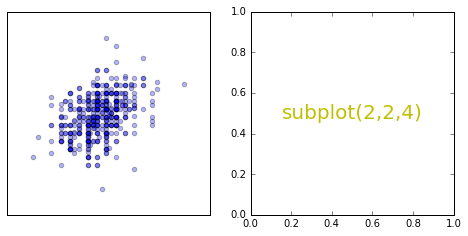

In [36]:
fig = plt.figure(figsize=(8, 8))
sub1 = fig.add_subplot(221)
sub1.set_xticks([60, 65, 70, 75, 80]) 
sub1.set_yticks([60, 65, 70, 75, 80]) 
sub1.scatter(father_son["Father"], father_son["Son"], alpha = 0.3)
sub2 = fig.add_subplot(222)
sub2.text(0.5, 0.5, 
          'subplot(2,2,4)', 
          ha='center', va='center',
          fontsize=20, 
          color="y")

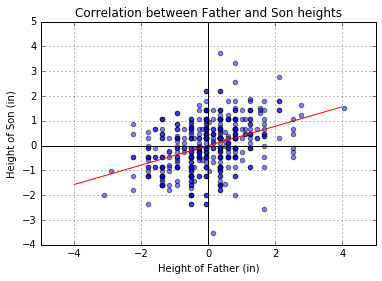

In [8]:
plt.scatter(father_son["Father"], father_son["Son"], alpha=0.5)
t = np.arange(-4, 4, 0.02)
plt.plot(t, t*rho, "r")
plt.title("Correlation between Father and Son heights")
plt.xlabel("Height of Father (in)")
plt.ylabel("Height of Son (in)")
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

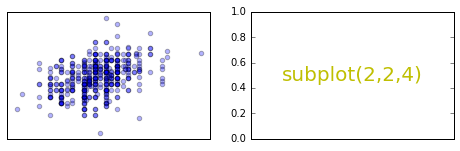